<a href="https://colab.research.google.com/github/AmmAhhRin/Machine-Learning-/blob/main/KNN_6_24_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#lib
import sklearn 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier 


from sklearn import datasets
from sklearn.preprocessing import StandardScaler  #--> learn StandardScaler: 

In [2]:
from google.colab import files 
upload = files.upload()

Saving IRIS.csv to IRIS.csv


In [3]:
#dataset 
iris = pd.read_csv('IRIS.csv')
iris.head(5)



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.values

In [ ]:
iris.shape

(150, 5)

In [5]:
xVar = ['sepal_length', 'petal_length', 'petal_length', 'petal_width']
yVar = ['species']

#reshape 
x = np.array(iris[xVar]).reshape(-1,4)
y = np.array(iris[yVar]).reshape(-1,1) #first value is -1, next value is the length of x variable
print(x.shape)
print(y.shape)

(150, 4)
(150, 1)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=1) #80% for training and 20% for testing #random_state = the testing and training data won't change all the time 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(120, 4)
(30, 4)
(120, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

The optimal K-value is 15


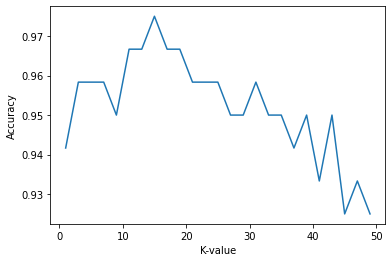

In [7]:
#first method of finding optimal k_value
kValue = [i for i in range(1,50,2)] #1-49 and only odd numbers
kAccScores = []

for k in kValue:   
  knnModel = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
  cvScores = cross_val_score(knnModel, x_train, y_train, cv=5, scoring='accuracy')
  kAccScores.append(cvScores.mean())

optimalK = kValue[kAccScores.index(max(kAccScores))]
print("The optimal K-value is {}".format(optimalK)) 

plt.plot(kValue,kAccScores)
plt.xlabel("K-value")
plt.ylabel("Accuracy")
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

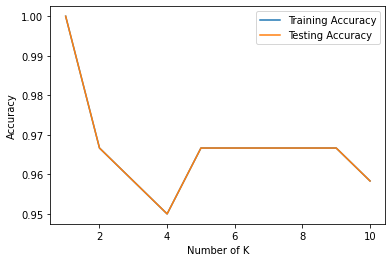

In [9]:
#second method to find optimal k_value
trainingAcc = []
testingAcc = []

neighbor = range(1,11)

for numberOfN in neighbor:
  knn = KNeighborsClassifier(n_neighbors=numberOfN)
  knn.fit(x_train,y_train)
  trainingAcc.append(knn.score(x_train,y_train))
  testingAcc.append(knn.score(x_train,y_train))

plt.plot(neighbor,trainingAcc, label="Training Accuracy")
plt.plot(neighbor,testingAcc, label="Testing Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of K")
plt.legend()

In [10]:
#model building 
knnModel = KNeighborsClassifier(n_neighbors=15, n_jobs=-1).fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [11]:
#predict using the whole dataset
y_predict = knnModel.predict(x_test)
y_predict = y_predict.reshape(-1)
print(y_predict)

#come up with data frame table of predict and actual --> Task 

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']


In [12]:
y_test = y_test.reshape(-1)
print(y_test)

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']


In [13]:
#create the dataframe or table
table = pd.DataFrame({"Predicted Values" : y_predict, "Actual Values": y_test})
print(table)


   Predicted Values    Actual Values
0       Iris-setosa      Iris-setosa
1   Iris-versicolor  Iris-versicolor
2   Iris-versicolor  Iris-versicolor
3       Iris-setosa      Iris-setosa
4    Iris-virginica   Iris-virginica
5   Iris-versicolor  Iris-versicolor
6    Iris-virginica   Iris-virginica
7       Iris-setosa      Iris-setosa
8       Iris-setosa      Iris-setosa
9    Iris-virginica   Iris-virginica
10  Iris-versicolor  Iris-versicolor
11      Iris-setosa      Iris-setosa
12   Iris-virginica   Iris-virginica
13  Iris-versicolor  Iris-versicolor
14  Iris-versicolor  Iris-versicolor
15      Iris-setosa      Iris-setosa
16  Iris-versicolor  Iris-versicolor
17  Iris-versicolor  Iris-versicolor
18      Iris-setosa      Iris-setosa
19      Iris-setosa      Iris-setosa
20  Iris-versicolor  Iris-versicolor
21  Iris-versicolor  Iris-versicolor
22   Iris-virginica  Iris-versicolor
23      Iris-setosa      Iris-setosa
24   Iris-virginica   Iris-virginica
25  Iris-versicolor  Iris-versicolor
2

In [14]:
knnModel.predict_proba(x_test) #check the probability of how correct the prediction is 

array([[1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 0.06666667, 0.93333333],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.86666667, 0.13333333],
       [0.        , 0.86666667, 0.13333333],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.86666667, 0.13333333],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.8       , 0.2       ],
       [0.

In [15]:
input = np.array([5.7, 2.5, 5.0, 2.0])
input = input.reshape(-1,4)


In [ ]:
y_predict1 = knnModel.predict(input)
print(y_predict1)

['Iris-versicolor']


In [ ]:
knnModel.predict_proba(input)

array([[0., 1., 0.]])

In [ ]:
#find the accuracy 
from sklearn.metrics import accuracy_score #spend some time to learn the formula
accuracyResult = accuracy_score(y_test, y_predict)
print(accuracyResult)


0.9666666666666667


It is one metric for evaluating the classification model. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition:

**Accuracy = number of correct predictions / total number of predictions**

For binary classification, accuracy can also be calculated in terms of positive and negative as follows:

**Accuracy = (TP + TN)/ (TP + TN + FP + FN)**

TP: true positive,
TN: true negative,
FP: false positive,
FN: false negative  


In [ ]:
accuracyResult1 = accuracy_score(input, y_predict1)
print(accuracyResult1)

ValueError: ignored

1. Lib
2. Use the dataset
3. Preprocessing
3.1. xVar and yVar
3.2. Reshape
4. Model Building
5. Predict the result 
5.1. Whole dataset 
5.2. One value
6. Probability of success and how efficient the model
7. Evaluation metrics (accuracy_score: suitable for single value ) 


Task:
1. Create the table
2. Learn the formula for accuracy score
3. learn and find the procedure to get optimal k-value